# Problem Statement
The purpose of the project is to predict median house values in Californian districts, given many features from these districts.
The project also aims at building a model of housing prices in California using the California census data. The data has metrics such as the population, median income, median housing price, and so on for each block group in California. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.
Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

In [1]:
# Import all necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#==============================================================================
# 1a. Load the data: Read the “Housing.csv” file from the folder into the program.
#==============================================================================
# Read in data into a dataframe
flatdata = pd.read_csv('housing.csv')

In [3]:
#==============================================================================
# 1b. Print first few rows of this data.
#==============================================================================
# Display top of dataframe
flatdata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
flatdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


<font color=blue>So from info above we can see that we have one object i.e. categorical feature(ocean_proximity), which need to be converted to numerical data.</font>

In [5]:
flatdata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


From data above, we can see that few columns has **abnormal data:**
-  total_rooms has mean 2635 and max 39320, which looks abnormal to have a house 39320 rooms.
-  total_bedrooms has mean 537 and max 6445 
-  median_income has Min income 0.4 and Max income 15, which doesn't make any sense.


<font color=blue>Let's check the features skewness,variation and spread by plotting Histograms.</font>

-  If the data are left-skewed, then the mean is typically LESS THAN the median.    
-  If the data are right-skewed, then the mean is typically GREATER THAN the median.
<br>
<font color=blue>
Outliers can be described as extremely low or high values that do not fall near any other data points. Sometimes outliers represent unusual cases. Other times they represent data entry errors, or perhaps data that does not belong with the other data of interest. Whatever the case may be, outliers can easily be identified using a histogram and should be investigated as they can shed interesting information about your data. </font>

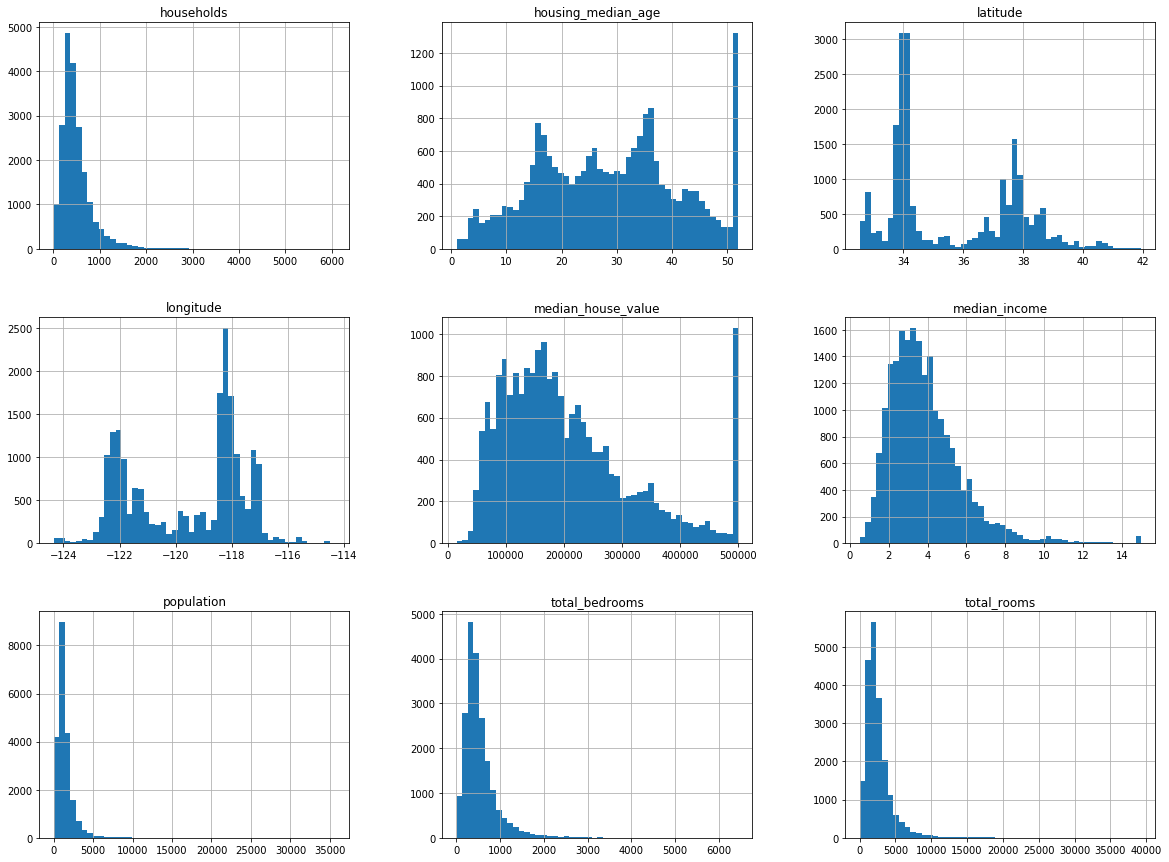

In [7]:
# Show Histograms
flatdata.hist(bins=50, figsize=(20,15))
plt.show()

<font color=blue>Let's check the frequency count for data and see how well balanced data is. From this we can see that "Island" frequency is very low compared to all other category.</font>

In [8]:
flatdata['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
flatdata['total_rooms'].value_counts()

1527     18
1582     17
1613     17
2127     16
2053     15
1607     15
1471     15
1717     15
1703     15
1722     15
1787     14
1705     14
1880     14
1724     14
1745     14
1562     14
1650     14
1743     14
1731     14
1759     13
2228     13
1808     13
1170     13
1283     13
1649     13
1755     13
1551     13
1462     13
1185     13
2017     13
         ..
5765      1
7812      1
9859      1
3702      1
5749      1
3686      1
5957      1
8020      1
5973      1
3926      1
136       1
6251      1
4202      1
104       1
88        1
72        1
6203      1
56        1
6171      1
4094      1
6155      1
8         1
10227     1
6117      1
10211     1
6101      1
8068      1
8052      1
5989      1
4122      1
Name: total_rooms, Length: 5926, dtype: int64

<font color=blue>Let's check correlation between different features including label. This will help us to decide which feature is important.</font>

In [10]:
# Draw correlation table to check how fetaures are correlated
cmap = sns.diverging_palette(5, 250, as_cmap=True)
# calculate the correlation matrix
corr = flatdata.corr()


def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1,-0.92,-0.11,0.045,0.07,0.1,0.055,-0.015,-0.046
latitude,-0.92,1,0.011,-0.036,-0.067,-0.11,-0.071,-0.08,-0.14
housing_median_age,-0.11,0.011,1,-0.36,-0.32,-0.3,-0.3,-0.12,0.11
total_rooms,0.045,-0.036,-0.36,1,0.93,0.86,0.92,0.2,0.13
total_bedrooms,0.07,-0.067,-0.32,0.93,1,0.88,0.98,-0.0077,0.05
population,0.1,-0.11,-0.3,0.86,0.88,1,0.91,0.0048,-0.025
households,0.055,-0.071,-0.3,0.92,0.98,0.91,1,0.013,0.066
median_income,-0.015,-0.08,-0.12,0.2,-0.0077,0.0048,0.013,1,0.69
median_house_value,-0.046,-0.14,0.11,0.13,0.05,-0.025,0.066,0.69,1


From table above we can see:
total_rooms, total_bedrooms, population and households features are strongly correlated. But only median_income is strongly correlated with output(label) median_house_value, rest all features has very weak correlation with output.

In [11]:
#==============================================================================
# 1c. Extract input (X) and output (y) data from the dataset.
#==============================================================================

X = flatdata.iloc[:,:9] 
y = flatdata.iloc[:,-1]

In [12]:
#==============================================================================
# 2. Handle missing values: Fill the missing values with “mean” of the respective column. 
#==============================================================================
X.fillna(X.mean(), inplace=True)

In [13]:
#==============================================================================
#3. Encode categorical data: Convert categorical column in the dataset to numerical data. 
#   Convert Categorial data to numerical data
#==============================================================================
dummy = pd.get_dummies(flatdata['ocean_proximity'])
dummy.head()
X = pd.concat([X,dummy], axis=1)
X.drop(['ocean_proximity'], inplace=True, axis=1, errors='ignore')
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [14]:
#==============================================================================
#4. Split the dataset: 	Split the data into 80% training dataset and 20% test dataset.  
# 
#==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

In [15]:
#==============================================================================
# 5. Standardize data: Standardize training and test datasets.
#==============================================================================

#Standardize training and test datasets
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression

Coefficients: 
 [-5.38266480e+04 -5.41905326e+04  1.38995015e+04 -1.35257430e+04
  4.41387602e+04 -4.33848157e+04  1.77451975e+04  7.52776870e+04
  2.44418148e+17  2.28783407e+17  7.65463905e+15  1.55288650e+17
  1.63409615e+17]
Variance score: 0.6252828905398875


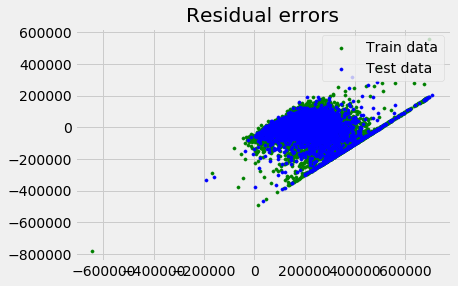

In [16]:
#==============================================================================
# 6. Perform Linear Regression: Perform Linear Regression on training data. 
#    Predict output for test dataset using the fitted model. 
#    Print root mean squared error (RMSE) from Linear Regression. 
#   (HINT: Import mean_squared_error from sklearn.metrics)
#==============================================================================
# create linear regression object
linearReg = linear_model.LinearRegression()
 
# train the model using the training sets
linearReg.fit(X_train, y_train)
 
# regression coefficients
print('Coefficients: \n', linearReg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(linearReg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(linearReg.predict(X_train), linearReg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(linearReg.predict(X_test), linearReg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## function to show plot
plt.show()

In [17]:
model = sm.OLS(y, X).fit()
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     3130.
Date:                Sun, 08 Jul 2018   Prob (F-statistic):               0.00
Time:                        17:15:25   Log-Likelihood:            -2.5917e+05
No. Observations:               20640   AIC:                         5.184e+05
Df Residuals:                   20627   BIC:                         5.185e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -2.646e+04   1014.035    -26.092      0.000   -2.84e+04   -2.45e+04
latitude            -2.52e+04    999.908    -25.200      0.000   -2.72e+04   -2.32e+04
housing_median_age  1057.8638     43.704     24.205      0.000     972.200    1143.528
total_rooms           -4.7725      0.772     -6.186      0.000      -6.285      -3.260
total_bedrooms        72.2896      5.984     12.080      0.000      60.560      84.019
population           -39.2618      1.064    -36.896      0.000     -41.348     -37.176
households            76.9409      6.696     11.490      0.000      63.816      90.066
median_income       3.877e+04    332.447    116.635      0.000    3.81e+04    3.94e+04
<1H OCEAN          -2.236e+06   8.75e+04    -25.552      0.000   -2.41e+06   -2.06e+06
INLAND             -2.275e+06   8.65e+04    -26.312      0.000   -2.44e+06   -2.11e+06
ISLAND              -2.08e+06   9.34e+04    -22.257      0.000   -2.26e+06    -1.9e+06
NEAR BAY           -2.239e+06   8.79e+04    -25.467      0.000   -2.41e+06   -2.07e+06
NEAR OCEAN         -2.231e+06   8.78e+04    -25.396      0.000    -2.4e+06   -2.06e+06
==============================================================================
Omnibus:                     5175.381   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19749.153
Skew:                           1.212   Prob(JB):                         0.00
Kurtosis:                       7.133   Cond. No.                     1.62e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color=blue> Let's check VIF(Variance Inflation Factors) since there is strong multicollinearity in our data and High VIF is a sign of multicollinearity.</font>

In [18]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,18.0,longitude
1,19.9,latitude
2,1.3,housing_median_age
3,12.4,total_rooms
4,27.5,total_bedrooms
5,6.3,population
6,28.6,households
7,1.7,median_income
8,14806.3,<1H OCEAN
9,10371.9,INLAND


In [19]:
y_pred = linearReg.predict(X_test)
y_pred

array([ 65081.85875486, 134553.85875486, 264249.85875486, ...,
       439513.85875486, 120825.85875486, 183545.85875486])

In [20]:
meanSquaredError = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error Linear Regression:", np.sqrt(meanSquaredError))

Root Mean Squared Error Linear Regression: 70073.7229307113


# PCA

In [21]:
# create the PCA instance
pca = PCA(2)
# fit on data
principalComponents = pca.fit_transform(X_train)
principalComponentsDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
# access values and vectors
print("PCA components",pca.components_)
print("PCA explained variance", pca.explained_variance_)

PCA components [[ 0.09307406 -0.0900983  -0.22004009  0.47941422  0.48629273  0.46976502
   0.48775462  0.04701803  0.05452446 -0.00705819 -0.00487328 -0.06776979
  -0.00704235]
 [-0.51771042  0.56586453 -0.02457535  0.09411124  0.08362092  0.0445403
   0.07833978 -0.08508351 -0.43430721  0.288156   -0.00904831  0.3233286
  -0.06066196]]
PCA explained variance [3.92203344 2.56917373]


# Decision Tree Regression 

In [22]:
#==============================================================================
# 7. Perform Decision Tree Regression 
#    Perform Decision Tree Regression on training data. 
#    Predict output for test dataset using the fitted model.
#    Print root mean squared error from Decision Tree Regression.
#==============================================================================
# Creating the regressor object
decisionTreeRegressor = DecisionTreeRegressor(random_state = 100,max_depth=3)
 
# Performing training
decisionTreeRegressor.fit(X_train, y_train)
 

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=100, splitter='best')

In [23]:
#Predicton on test
y_pred_dt = decisionTreeRegressor.predict(X_test)
print("Predicted values:")
print(y_pred_dt)

Predicted values:
[ 91153.88602392  91153.88602392 236666.50700104 ... 457673.82934609
  91153.88602392 236666.50700104]


In [24]:
meanSquaredError = mean_squared_error(y_test, y_pred_dt)
print("Root Mean Squared Error Decision tree:", np.sqrt(meanSquaredError))

Root Mean Squared Error Decision tree: 76813.08836942779


# Random Forest Regression

In [35]:
#==============================================================================
# 8. Perform Random Forest Regression Perform Random Forest Regression on training data. 
#    Predict output for test dataset using the fitted model. 
#    Print RMSE (root mean squared error) from Random Forest Regression.
#==============================================================================
# Instantiate model with 1000 decision trees
randomForestRegressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
randomForestRegressor.fit(X_train, y_train);

In [36]:
# Use the forest's predict method on the test data
predictions = randomForestRegressor.predict(X_test)
predictions

array([ 53677.4  ,  68864.8  , 468151.253, ..., 498836.182,  69128.3  ,
       170960.   ])

In [37]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 31459.18 degrees.


In [38]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 82.33 %.


In [39]:
rfMeanSquaredError = mean_squared_error(y_test, predictions)
print("Root Mean Squared Error Random Forest:", np.sqrt(rfMeanSquaredError))

Root Mean Squared Error Random Forest: 48680.74149870611


# Linear Regression with one independent variable

In [30]:
#==============================================================================
# 9. Bonus exercise:Perform Linear Regression with one independent variable 
#    Extract just the median_income column from the independent variables (from X_train and X_test).
#    Perform Linear Regression to predict housing values based on median_income. 
#    Predict output for test dataset using the fitted model.
#    Plot the fitted model for training data as well as for test data to check if the fitted model 
#    satisfies the test data.
#==============================================================================
#Extract training median_income from training data i.e. X_train
median_income_train = X_train[:,7:8]
median_income_train

array([[-0.326196  ],
       [-0.03584338],
       [ 0.14470145],
       ...,
       [-0.49697313],
       [ 0.96545045],
       [-0.68544764]])

In [31]:
#Extract test median_income from test data i.e. X_test
median_income_test = X_test[:,7:8]

In [32]:
# create linear regression object
#linearReg = linear_model.LinearRegression()
 
# train the model using the training sets
linearReg.fit(median_income_train, y_train)
y_pred = linearReg.predict(median_income_test)
y_pred

array([114958.91676996, 150606.88213964, 190393.71844449, ...,
       431500.77230409, 161245.49973085, 193412.95560084])

In [33]:
meanSquaredError = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error Linear Regression:", np.sqrt(meanSquaredError))

Root Mean Squared Error Linear Regression: 84209.01241414454


Text(0,0.5,'Predictions')

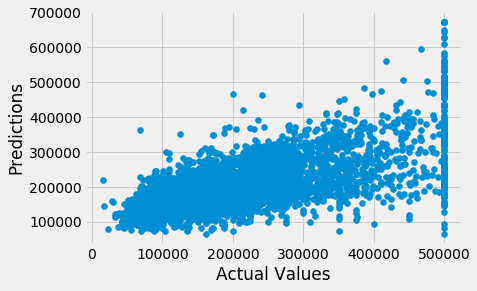

In [34]:
## The line / model
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predictions")

# Summary

RMSE is very high with current data and different models. RMSE ranges from 84209.012 (One Feature Linear Regression) to 48680.74 (Random Forest with 1000 DTs). With Random Forest RMSE came to 48680 when we increased number of tress but still it is very high.

From data analysis we can see that data is highly imbalanced. total_rooms, total_bedrooms, population and households are strongly correlated. Only median_income is strongly correlated with median_house_value, rest all features has very weak correlation. From Histogram we can see that data is skewed.

So we need more balanced data inorder to create good model with higher accuracy.